Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
1875/1875 - 1s - loss: 2.2931e-05 - accuracy: 1.0000 - 1s/epoch - 781us/step
313/313 - 0s - loss: 0.1256 - accuracy: 0.9802 - 220ms/epoch - 701us/step


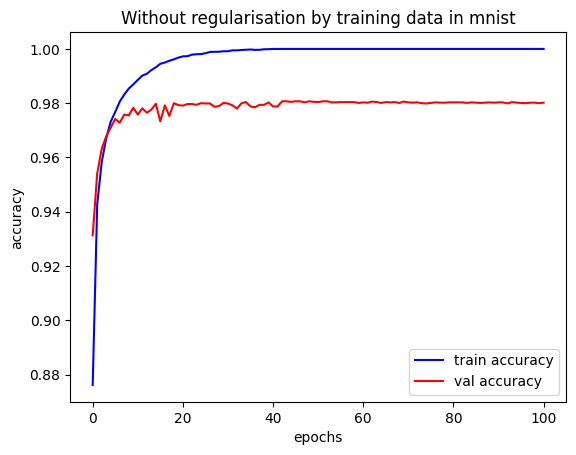

1875/1875 - 2s - loss: 0.1960 - accuracy: 0.9655 - 2s/epoch - 849us/step
313/313 - 0s - loss: 0.2183 - accuracy: 0.9568 - 242ms/epoch - 773us/step


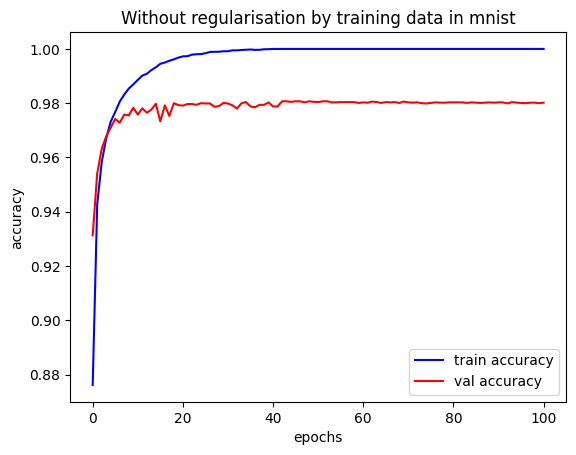

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

# Batch Nomalisation: 노드들의 값들을 nomalisation 하는 것? => overfitting 문제를 해결

#1
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#2: normalise images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) #(60000, 10)
y_test = tf.keras.utils.to_categorical(y_test) #(10000, 10)

#4: build a model without regularisation
act = "relu"
init = "he_uniform"
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

#4-1: configure the model for training
opt = 'rmsprop'
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#4-2: train and evalute the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=400, 
                validation_data=(x_test, y_test), verbose=0)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

#4-3: plot accuracies
plt.title("Without regularisation by training data in mnist")
plt.plot(ret.history['accuracy'],    "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'],"r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

#5: bulid a model with weight regularisation
reg = tf.keras.regularizers.l2(0.01)
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model2.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init, kernel_regularizer=reg))
model2.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init, kernel_regularizer=reg))
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))
# model2.summary()

#5-1: configure the model for training
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#5-2: train and evaluate the model
ret2 = model2.fit(x_train, y_train, epochs=201, batch_size=400, 
                validation_data=(x_test, y_test), verbose=0)

train_loss, train_acc = model2.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model2.evaluate(x_test, y_test, verbose=2)

#5-3: plot accuracy
plt.title("Without regularisation by training data in mnist")
plt.plot(ret.history['accuracy'],    "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'],"r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()